In [235]:
import pandas as pd
import tweepy
import os
import requests
import numpy
import json
import matplotlib.pyplot as plt
import seaborn as sb

## <u> Gather </u>

### Programmatically download tweet image prediction file 

In [236]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [237]:
folder_name = os.getcwd()
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

### Set up Twitter API credentials

In [238]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

### Import Datasets

In [239]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [240]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [241]:
twitter_archive.timestamp[0]

'2017-08-01 16:23:56 +0000'

In [242]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [243]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### While waiting for Twitter to activate developer account, use prewritten code to access API

In [244]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [245]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [246]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [247]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        break
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

0.0006227750000107335
{}


### Open json response .txt file 

In [248]:
with open('tweet_example_json.txt', encoding='utf-8') as json_file:
    tweet_list = []
    for line in json_file:
        tweet_list.append(json.loads(line))
        
tweet_list

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [249]:
tweet_list[0]['retweet_count']

8853

In [250]:
len(tweet_list)

2354

In [251]:
refav_df = pd.DataFrame(index = range(len(tweet_list)), columns = ['id', 'retweet_count', 'favorite_count'])
for c in range(len(tweet_list)):
    refav_df['id'][c] = tweet_list[c]['id']
    refav_df['retweet_count'][c] = tweet_list[c]['retweet_count']
    refav_df['favorite_count'][c] = tweet_list[c]['favorite_count']
    


In [252]:
refav_df

id retweet_count favorite_count
0     892420643555336193          8853          39467
1     892177421306343426          6514          33819
2     891815181378084864          4328          25461
3     891689557279858688          8964          42908
4     891327558926688256          9774          41048
...                  ...           ...            ...
2349  666049248165822465            41            111
2350  666044226329800704           147            311
2351  666033412701032449            47            128
2352  666029285002620928            48            132
2353  666020888022790149           532           2535

[2354 rows x 3 columns]

## <u> Assess </u>

In [253]:
twitter_archive.source.values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

- Source is the exact same for each tweet, therefore it is unnecessary

In [254]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- There are 179 retweets in the twitter_archive dataset

In [255]:
clean_time = [date.strip() for date, zeros in twitter_archive.timestamp.str.rsplit('+')]
sorted(clean_time, reverse = True)[0]

'2017-08-01 16:23:56'

- Latest date is August 1st, 2017, so no need to remove any posts due to the time restriction

In [256]:
twitter_archive[twitter_archive.text.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

- no duplicate cells

In [257]:
dog_keywords = twitter_archive.loc[:,'doggo':'puppo']

In [258]:
dog_keywords = dog_keywords.replace('None', pd.np.nan)

/Users/jessewm2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [259]:
dog_keywords.dropna(thresh = 2)

doggo  floofer  pupper  puppo
191   doggo      NaN     NaN  puppo
200   doggo  floofer     NaN    NaN
460   doggo      NaN  pupper    NaN
531   doggo      NaN  pupper    NaN
565   doggo      NaN  pupper    NaN
575   doggo      NaN  pupper    NaN
705   doggo      NaN  pupper    NaN
733   doggo      NaN  pupper    NaN
778   doggo      NaN  pupper    NaN
822   doggo      NaN  pupper    NaN
889   doggo      NaN  pupper    NaN
956   doggo      NaN  pupper    NaN
1063  doggo      NaN  pupper    NaN
1113  doggo      NaN  pupper    NaN

- dog keyword columns are not mutually exclusive

### <u> Quality </u>
- Some of the rating numerators and denominators are not extracted correctly
- Timestamp column is a string, not a DataTime object
- +0000 at the end of the timestamp
- in_reply_to columns are unnecessary
- There are 179 retweets in the twitter_archive dataset
- img_num column in table is unnecessary
- Values for dog keywords columns should be Booleans
- 3 predictions for each tweet is unnecessary, just need the highest probablity tweet that is a dog
- source column is the exact same for each column, so it is unnecessary

### <u> Tidiness </u>

- Image predictions should be merged with the twitter archive table, as they share the same observational unit
- retweet and favorited table should be merged with twitter archive table, as they share the same observational unit
- rating_numerator and rating_denominator should be one column


## <u> Clean </u>

### Define
- Create and implement function that reduces image predictions table to just 1 dog prediction per tweet and the confidence level or null

### Code

In [260]:
image_pred_clean = image_predictions.copy()

In [261]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [262]:
def get_dog_pred(data):
    preds = pd.DataFrame(index = data.index.values, columns = ['pred', 'conf'])
    for c in range(len(data)):
        if data.iloc[c, :].p1_dog == True:
            preds.iloc[c, 0] = data.iloc[c, :].p1
            preds.iloc[c, 1] = data.iloc[c, :].p1_conf
        elif data.iloc[c, :].p2_dog == True:
            preds.iloc[c, 0] = data.iloc[c, :].p2
            preds.iloc[c, 1] = data.iloc[c, :].p2_conf
        elif data.iloc[c, :].p3_dog == True:
            preds.iloc[c, 0] = data.iloc[c, :].p3
            preds.iloc[c, 1] = data.iloc[c, :].p3_conf
    
    return preds


In [263]:
image_pred_clean[['pred', 'conf']] = get_dog_pred(image_pred_clean)

In [264]:
image_pred_clean = image_pred_clean.drop(image_pred_clean.columns[3:12], axis = 1)

### Test

In [265]:
image_pred_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                    pred      conf  
0        1  Welsh_springer_spaniel  0.465074  
1        1                 redbone  0.506826  
2        1         German_shepherd  0.596461  
3        1     Rhodesian_ridgeback  0.408143  
4        1      miniature_pinscher  0.560311

### Define
- Merge refav_df and image_predictions df with twitter_archive

### Code

In [266]:
t_arch_clean = twitter_archive.copy()

In [267]:
t_arch_clean = t_arch_clean.merge(refav_df, left_on = 'tweet_id', right_on = 'id')
t_arch_clean = t_arch_clean.merge(image_pred_clean, left_on = 'tweet_id', right_on = 'tweet_id')


### Test

In [268]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Define
- Drop retweets from the table

### Code

In [269]:
retweet_indexes = t_arch_clean[t_arch_clean.retweeted_status_id.notnull()].index.values

In [270]:
t_arch_clean = t_arch_clean.drop(retweet_indexes, axis = 0)

### Test

In [271]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

### Define
- Drop unnecessary columns in table (id, in reply to columns, retweet columns, img_num) 

### Code

In [272]:
t_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                   'retweeted_status_timestamp', 'id', 'img_num', 'source'], axis = 1, inplace = True)

### Test

In [273]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1994 non-null   object
 1   timestamp           1994 non-null   object
 2   text                1994 non-null   object
 3   expanded_urls       1994 non-null   object
 4   rating_numerator    1994 non-null   int64 
 5   rating_denominator  1994 non-null   int64 
 6   name                1994 non-null   object
 7   doggo               1994 non-null   object
 8   floofer             1994 non-null   object
 9   pupper              1994 non-null   object
 10  puppo               1994 non-null   object
 11  retweet_count       1994 non-null   object
 12  favorite_count      1994 non-null   object
 13  jpg_url             1994 non-null   object
 14  pred                1686 non-null   object
 15  conf                1686 non-null   object
dtypes: int64(2), object(14)


### Define
- Drop zero's at end of timestamp variable and convert from string (object) to DateTime object

### Code

In [276]:
t_arch_clean['timestamp'] = t_arch_clean.timestamp.str[:-5]

In [277]:
t_arch_clean.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2068    2015-11-16 00:24:50 
2069    2015-11-16 00:04:52 
2070    2015-11-15 23:21:54 
2071    2015-11-15 23:05:30 
2072    2015-11-15 22:32:08 
Name: timestamp, Length: 1994, dtype: object

In [278]:
t_arch_clean['timestamp'] = pd.to_datetime(t_arch_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

### Test

In [279]:
t_arch_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo retweet_count  \
0                  10   Phineas  None    None   None  None          8853   
1                  10     Tilly  None    None   None  None          6514   
2                  10    Archie  None    None   None  None          4328   
3                  10     Darla  None    None   None  None          8964   
4                  10  Franklin  None    None   None  None          9774   

  favorite_count                                          jpg_url  \
0          39467  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1          33819  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2          25461  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3          42908  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
4          41048  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

                 pred      conf  
0                 NaN       NaN  
1           Chihuahua  0.323581  
2           Chihuahua  0.716012  
3  Labrador_retriever  0.168086  
4              basset  0.555712

In [280]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   text                1994 non-null   object        
 3   expanded_urls       1994 non-null   object        
 4   rating_numerator    1994 non-null   int64         
 5   rating_denominator  1994 non-null   int64         
 6   name                1994 non-null   object        
 7   doggo               1994 non-null   object        
 8   floofer             1994 non-null   object        
 9   pupper              1994 non-null   object        
 10  puppo               1994 non-null   object        
 11  retweet_count       1994 non-null   object        
 12  favorite_count      1994 non-null   object        
 13  jpg_url             1994 non-null   object      

### Define
- Extract the correct ratings from the text value into one column called 'rating'

### Code

In [281]:
t_arch_clean['rating'] = t_arch_clean.text.str.extract(r'(\d\d?\d?/\d\d)').dropna()

In [282]:
t_arch_clean[t_arch_clean.rating.notnull() == False]

tweet_id           timestamp  \
415  810984652412424192 2016-12-19 23:06:23   

                                                  text  \
415  Meet Sam. She smiles 24/7 &amp; secretly aspir...   

                                         expanded_urls  rating_numerator  \
415  https://www.gofundme.com/sams-smile,https://tw...                24   

     rating_denominator name doggo floofer pupper puppo retweet_count  \
415                   7  Sam  None    None   None  None          1655   

    favorite_count                                          jpg_url  \
415           5927  https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg   

                 pred      conf rating  
415  golden_retriever  0.871342    NaN

- This cell doesn't have a rating, so we'll drop it

In [283]:
t_arch_clean.drop(415, axis = 0, inplace = True)

In [284]:
t_arch_clean[['rating', 'rating_numerator', 'rating_denominator']]

rating  rating_numerator  rating_denominator
0     13/10                13                  10
1     13/10                13                  10
2     12/10                12                  10
3     13/10                13                  10
4     12/10                12                  10
...     ...               ...                 ...
2068   5/10                 5                  10
2069   6/10                 6                  10
2070   9/10                 9                  10
2071   7/10                 7                  10
2072   8/10                 8                  10

[1993 rows x 3 columns]

In [285]:
t_arch_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

### Test

In [286]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1993 non-null   object        
 1   timestamp       1993 non-null   datetime64[ns]
 2   text            1993 non-null   object        
 3   expanded_urls   1993 non-null   object        
 4   name            1993 non-null   object        
 5   doggo           1993 non-null   object        
 6   floofer         1993 non-null   object        
 7   pupper          1993 non-null   object        
 8   puppo           1993 non-null   object        
 9   retweet_count   1993 non-null   object        
 10  favorite_count  1993 non-null   object        
 11  jpg_url         1993 non-null   object        
 12  pred            1685 non-null   object        
 13  conf            1685 non-null   object        
 14  rating          1993 non-null   object        
dtypes: d

### Define
- Convert dog keyword columns to Boolean values

### Code

In [287]:
# Use the map function to convert to booleans
dog_keywords = ['doggo', 'floofer', 'puppo', 'pupper']
d = {'': True, 'Undelivered': False}
for keyword in dog_keywords:
    d = {'{}'.format(keyword): True, 'None': False}
    t_arch_clean[keyword] = t_arch_clean[keyword].map(d)

### Test

In [288]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1993 non-null   object        
 1   timestamp       1993 non-null   datetime64[ns]
 2   text            1993 non-null   object        
 3   expanded_urls   1993 non-null   object        
 4   name            1993 non-null   object        
 5   doggo           1993 non-null   bool          
 6   floofer         1993 non-null   bool          
 7   pupper          1993 non-null   bool          
 8   puppo           1993 non-null   bool          
 9   retweet_count   1993 non-null   object        
 10  favorite_count  1993 non-null   object        
 11  jpg_url         1993 non-null   object        
 12  pred            1685 non-null   object        
 13  conf            1685 non-null   object        
 14  rating          1993 non-null   object        
dtypes: b

In [289]:
t_arch_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name  doggo  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas  False   
1  https://twitter.com/dog_rates/status/892177421...     Tilly  False   
2  https://twitter.com/dog_rates/status/891815181...    Archie  False   
3  https://twitter.com/dog_rates/status/891689557...     Darla  False   
4  https://twitter.com/dog_rates/status/891327558...  Franklin  False   

   floofer  pupper  puppo retweet_count favorite_count  \
0    False   False  False          8853          39467   
1    False   False  False          6514          33819   
2    False   False  False          4328          25461   
3    False   False  False          8964          42908   
4    False   False  False          9774          41048   

                                           jpg_url                pred  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                 NaN   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  Labrador_retriever   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg              basset   

       conf rating  
0       NaN  13/10  
1  0.323581  13/10  
2  0.716012  12/10  
3  0.168086  13/10  
4  0.555712  12/10

### Define
- Convert retweet_count and favorite_count columns as integers, conf as floats

### Code

In [290]:
t_arch_clean['retweet_count'] = t_arch_clean['retweet_count'].astype(int)

In [291]:
t_arch_clean['favorite_count'] = t_arch_clean['favorite_count'].astype(int)

In [292]:
t_arch_clean['conf'] = t_arch_clean['conf'].astype(float).round(decimals = 2)

### Test

In [293]:
t_arch_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name  doggo  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas  False   
1  https://twitter.com/dog_rates/status/892177421...     Tilly  False   
2  https://twitter.com/dog_rates/status/891815181...    Archie  False   
3  https://twitter.com/dog_rates/status/891689557...     Darla  False   
4  https://twitter.com/dog_rates/status/891327558...  Franklin  False   

   floofer  pupper  puppo  retweet_count  favorite_count  \
0    False   False  False           8853           39467   
1    False   False  False           6514           33819   
2    False   False  False           4328           25461   
3    False   False  False           8964           42908   
4    False   False  False           9774           41048   

                                           jpg_url                pred  conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                 NaN   NaN   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           Chihuahua  0.32   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           Chihuahua  0.72   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  Labrador_retriever  0.17   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg              basset  0.56   

  rating  
0  13/10  
1  13/10  
2  12/10  
3  13/10  
4  12/10

In [294]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1993 non-null   object        
 1   timestamp       1993 non-null   datetime64[ns]
 2   text            1993 non-null   object        
 3   expanded_urls   1993 non-null   object        
 4   name            1993 non-null   object        
 5   doggo           1993 non-null   bool          
 6   floofer         1993 non-null   bool          
 7   pupper          1993 non-null   bool          
 8   puppo           1993 non-null   bool          
 9   retweet_count   1993 non-null   int64         
 10  favorite_count  1993 non-null   int64         
 11  jpg_url         1993 non-null   object        
 12  pred            1685 non-null   object        
 13  conf            1685 non-null   float64       
 14  rating          1993 non-null   object        
dtypes: b

### Save t_arch_clean as twitter_archive_master.csv

In [295]:
t_arch_clean.to_csv('twitter_archive_master.csv', index = False)

## <u>Analysis and Visualization</u>

- Mean # of retweets per dog keyword

In [296]:
def get_retweet_means(data):
    retweet_means = pd.DataFrame(index = range(1), columns = dog_keywords)
    for keyword in data[['doggo', 'puppo', 'pupper', 'floofer']]:
        keyword_mean = data.query('{} == True'.format(keyword)).retweet_count.mean()
        retweet_means[keyword][0] = keyword_mean
        
    return retweet_means

In [297]:
def get_favorite_means(data):
    favorite_means = pd.DataFrame(index = range(1), columns = dog_keywords)
    for keyword in data[['doggo', 'puppo', 'pupper', 'floofer']]:
        keyword_mean = data.query('{} == True'.format(keyword)).favorite_count.mean()
        favorite_means[keyword][0] = keyword_mean
        
    return favorite_means

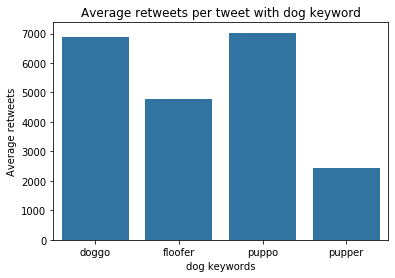

In [298]:
base_color = sb.color_palette()[0]
sb.barplot(data = get_retweet_means(t_arch_clean), 
           color = base_color)
plt.xlabel('dog keywords')
plt.ylabel('Average retweets')
plt.title('Average retweets per tweet with dog keyword');                             
                            

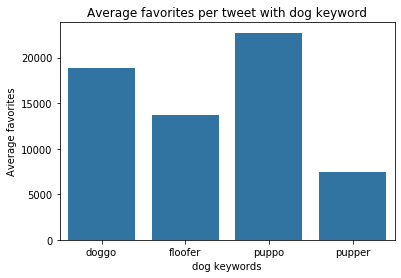

In [299]:
sb.barplot(data = get_favorite_means(t_arch_clean), 
           color = base_color)
plt.xlabel('dog keywords')
plt.ylabel('Average favorites')
plt.title('Average favorites per tweet with dog keyword'); 

- 90 tweet moving average for retweets and favorites shows strong growth in popularity over time for the twitter account

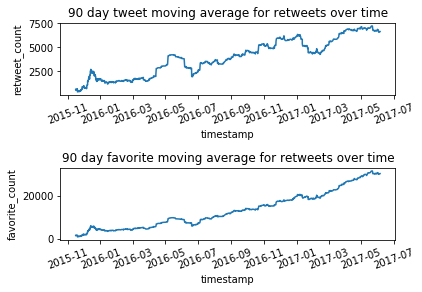

In [344]:
plt.subplot(2, 1, 1)
sb.lineplot(data = t_arch_clean, x = 'timestamp',
            y = t_arch_clean.retweet_count.rolling(90).mean())
plt.xticks(rotation = 20)
plt.title('90 day tweet moving average for retweets over time');

plt.subplot(2, 1, 2)
sb.lineplot(data = t_arch_clean, x = 'timestamp',
            y = t_arch_clean.favorite_count.rolling(90).mean())
plt.xticks(rotation = 20)
plt.title('90 day favorite moving average for retweets over time')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1);

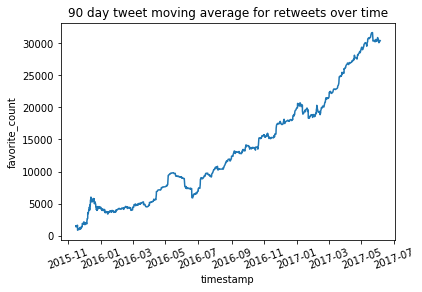

In [323]:
sb.lineplot(data = t_arch_clean, x = 'timestamp',
            y = t_arch_clean.favorite_count.rolling(90).mean())
plt.xticks(rotation = 20)
plt.title('90 day favorite moving average for retweets over time');

In [321]:
t_arch_clean.groupby(['pred']).mean().retweet_count.sort_values(ascending = False)

pred
Bedlington_terrier    7510.166667
Afghan_hound          5976.000000
standard_poodle       5508.909091
English_springer      5401.600000
Saluki                5133.750000
                         ...     
EntleBucher            706.000000
Tibetan_terrier        557.750000
Japanese_spaniel       471.000000
Brabancon_griffon      287.666667
groenendael            276.500000
Name: retweet_count, Length: 113, dtype: float64

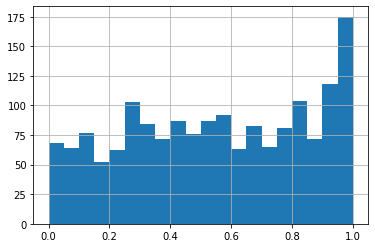

In [328]:
t_arch_clean.conf.hist(bins = 20)